In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
data = pd.read_parquet("data.parquet")

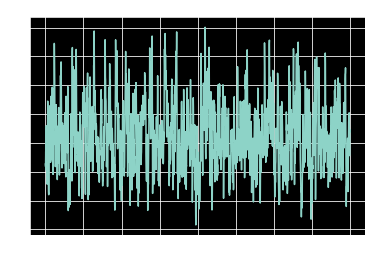

In [4]:
plt.plot(np.arange(len(data)),data["WfeRms"])
plt.grid()
#plt.xlim([0,200])

In [5]:
data = pd.read_parquet("pssn-fwhm.parquet")


In [6]:
data

,PSSnFwhm
0,"[0.4447683095932007, 2.3251066344012883e-06]"


In [18]:
7.263218905549019e-07*180*3600/np.pi

0.14981464402833158

In [7]:
2.3251066344012883e-06*180*3600/np.pi


0.4795876694486201